# Лабораторная работа №3

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv("insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Подготовка данных


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [99]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [100]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [101]:
num_columns = ["age", "bmi", "children", "charges"]
categorial_columns = list(set(data.columns) - set(num_columns))
print("численные:", num_columns)
print("категориальные:", categorial_columns)
print(data.shape)
data = data[(data[num_columns] - data[num_columns].mean() <= 3 * data[num_columns].std()).all(axis=1)]
print(data.shape)
data

численные: ['age', 'bmi', 'children', 'charges']
категориальные: ['region', 'sex', 'smoker']
(1338, 7)
(1309, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [102]:
data = pd.get_dummies(data, columns=categorial_columns, drop_first=True)
data

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,False,True,False,True
1,18,33.770,1,1725.55230,False,True,False,True,False
2,28,33.000,3,4449.46200,False,True,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False
4,32,28.880,0,3866.85520,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,False,True,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,True,False,False,False
1336,21,25.800,0,2007.94500,False,False,True,False,False


In [103]:
data.corr()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
age,1.000000,0.118178,0.059100,0.305263,-0.003449,-0.014346,0.013766,-0.019253,-0.029090
bmi,0.118178,1.000000,0.029916,0.191453,-0.134342,0.261014,0.002552,0.042498,-0.005288
children,0.059100,0.029916,1.000000,0.100438,0.044948,-0.027381,0.001275,0.014056,0.028844
charges,0.305263,0.191453,0.100438,1.000000,-0.045847,0.074829,-0.042922,0.059455,0.785129
region_northwest,-0.003449,-0.134342,0.044948,-0.045847,1.000000,-0.346405,-0.321537,-0.006602,-0.040557
region_southeast,-0.014346,0.261014,-0.027381,0.074829,-0.346405,1.000000,-0.341411,0.013987,0.071776
region_southwest,0.013766,0.002552,0.001275,-0.042922,-0.321537,-0.341411,1.000000,-0.004798,-0.039005
sex_male,-0.019253,0.042498,0.014056,0.059455,-0.006602,0.013987,-0.004798,1.000000,0.079058
smoker_yes,-0.029090,-0.005288,0.028844,0.785129,-0.040557,0.071776,-0.039005,0.079058,1.000000


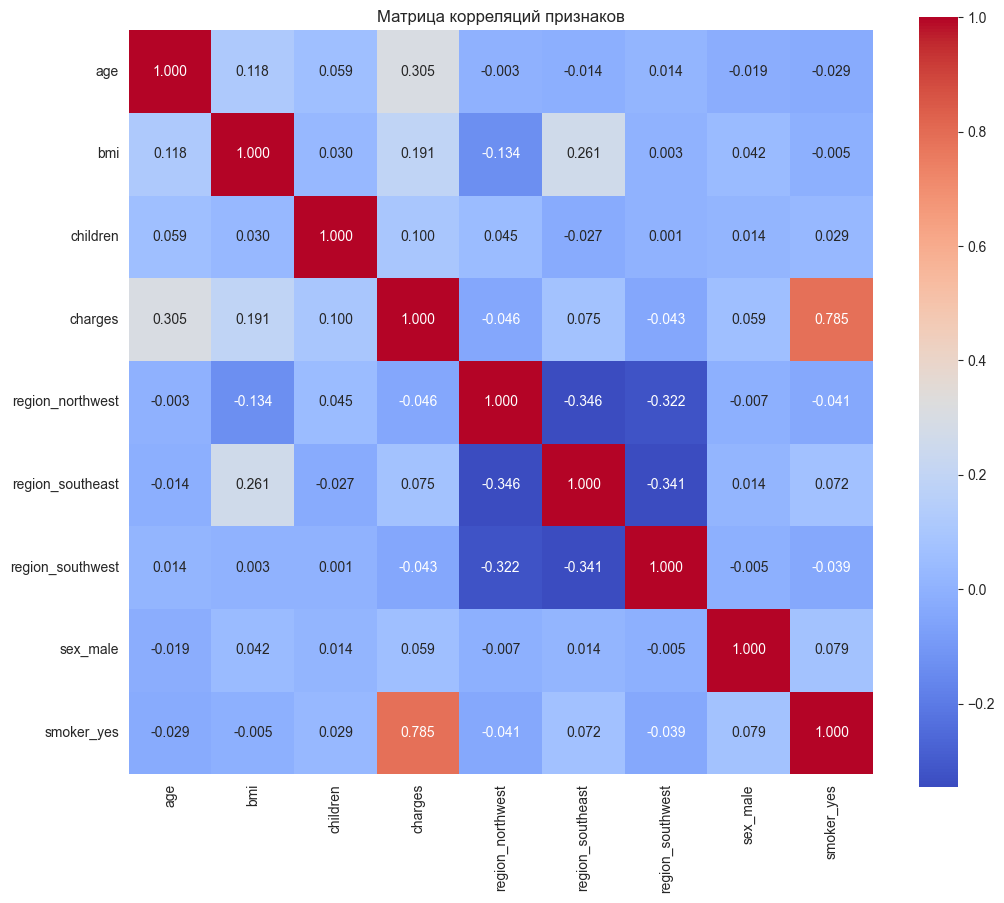

In [104]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".3f", square=True)
plt.title("Матрица корреляций признаков")
plt.show()

## Многомерная линейная регрессия

Будем предсказывать значение charges

In [105]:
Y = data["charges"].to_numpy(dtype=np.double)
X = data.drop("charges", axis=1).to_numpy(dtype=np.double)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler();

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Модель линейной регрессии 
$$\frac{1}{n}\sum\limits_{i=1}^n{(y_i - x_i * w - b) ^ 2} \rightarrow \min\limits_{w, b}$$

### Аналитическое решение

$\overline{X} - (1, X)$ расширенные признаки для байеса

$$(Y - \overline{X}W)^T(Y - \overline{X}W) \rightarrow \min$$

$$Y^TY - 2 Y^T\overline{X}W + W^T\overline{X}^T\overline{X}W \rightarrow \min$$

$$2\overline{X}^T\overline{X}W - 2 \overline{X}^TY = 0$$

$$2\overline{X}^T\overline{X}W = 2 \overline{X}^TY$$

$$W = (2\overline{X}^T\overline{X})^{-1}2\overline{X}^TY$$

In [106]:
from sklearn.base import RegressorMixin

class AnaliticRegression(RegressorMixin):
    def fit(self, X, Y):
        X = np.column_stack([np.ones(X.shape[0]), X]);
        w = 2 * np.linalg.inv(2 * X.T @ X) @ X.T @ Y
        self.b = w[0]
        self.w = w[1:]

    def predict(self, X):
        return X @ self.w + self.b

In [107]:
analitic = AnaliticRegression()
analitic.fit(X_train, Y_train)

print(analitic.w, "+", analitic.b)

from sklearn.metrics import mean_absolute_error, mean_squared_error

predicted = analitic.predict(X_test)

print("mae:", mean_absolute_error(Y_test, predicted))
print("rmse:", mean_squared_error(Y_test, predicted))

[3649.33512945 1924.02859237  629.28757949 -214.45651175 -470.59944911
 -511.63739358  -30.77749084 9208.30258541] + 13021.298104956048
mae: 3969.0341267772124
rmse: 30444091.526395813


### Градиентный спуск

In [108]:
from sklearn.base import RegressorMixin
import numpy as np

class LinearRegression(RegressorMixin):
    def __init__(self):
        self.max_steps = 20000
        self.step = 0.0001
        self.delta = 0.0001
        self.alpha = 0.4
        self.regularization = 0

    def fit(self, X, y):
        self.w = np.random.normal(-5000, 5000, X.shape[1:])
        self.b = 0

        var = np.sum(np.square(X @ self.w + self.b - y)) / len(X)
        i = 0
        prev_grad = 0
        prev_grad_b = 0
        while var > self.delta and i < self.max_steps:
            grad = 2 * (X @ self.w + self.b - y) @ X + 2 * self.regularization * self.w
            grad_b = 2 * (X @ self.w + self.b - y)
            mgrad = prev_grad * self.alpha + grad * (1 - self.alpha)
            mgrad_b = prev_grad_b * self.alpha + grad_b * (1 - self.alpha)
            prev_grad = mgrad
            prev_grad_b = mgrad_b
            self.w -= self.step * mgrad
            self.b -= self.step * mgrad_b[0]
            i += 1
            var = np.sum(np.square(X @ self.w + self.b - y)) / len(X)

        return self

    def predict(self, X):
        return X @ self.w + self.b

In [109]:
reg = LinearRegression()

reg.fit(X_train, Y_train)

print(reg.w, "+", reg.b)

predicted = reg.predict(X_test)

print("mae:", mean_absolute_error(Y_test, predicted))
print("rmse:", mean_squared_error(Y_test, predicted))

[3649.33512945 1924.02859237  629.28757949 -214.45651175 -470.59944911
 -511.63739358  -30.77749084 9208.30258541] + 11595.182013837068
mae: 3768.12413411168
rmse: 31764329.83884596


## Добавление регуляризации

Модель линейной регрессии 
$$\frac{1}{n}\sum\limits_{i=1}^n{(y_i - x_i * w - b) ^ 2 + \lambda w_i^2} \rightarrow \min\limits_{w, b}$$

### Аналитическое решение

$\overline{X} - (1, X)$ расширенные признаки для байеса

$$(Y - \overline{X}W)^T(Y - \overline{X}W) + \lambda W^TW \rightarrow \min$$

$$2\overline{X}^T\overline{X}W - 2 \overline{X}^TY + 2\lambda W = 0$$

$$(2\overline{X}^T\overline{X} +2 \lambda E) W = 2 \overline{X}^TY$$

$$W = (2\overline{X}^T\overline{X} +2 \lambda E)^{-1}(2 \overline{X}^TY)$$

In [110]:
from sklearn.base import RegressorMixin

class AnaliticRegression(RegressorMixin):
    def __init__(self):
        self.regularization = 0

    def fit(self, X, Y):
        X = np.column_stack([np.ones(X.shape[0]), X])
        E = np.eye(X.shape[1])
        E[0][0] = 0
        w = np.linalg.inv(2 * X.T @ X + 2 * self.regularization * E) @ (2 * X.T @ Y)
        self.b = w[0]
        self.w = w[1:]

    def predict(self, X):
        return X @ self.w + self.b

In [111]:
analitic = AnaliticRegression()
analitic.regularization = 1
analitic.fit(X_train, Y_train)

print(analitic.w, "+", analitic.b)

from sklearn.metrics import mean_absolute_error, mean_squared_error

predicted = analitic.predict(X_test)

print("mae:", mean_absolute_error(Y_test, predicted))
print("rmse:", mean_squared_error(Y_test, predicted))

[3646.01818704 1921.9736294   629.18997252 -213.8831276  -468.4099675
 -510.65218567  -29.98517725 9199.25965008] + 13021.298104956046
mae: 3970.264312223034
rmse: 30444628.509259652


### Градиентный спуск

In [112]:
reg = LinearRegression()
reg.regularization = 1

reg.fit(X_train, Y_train)

print(reg.w, "+", reg.b)

predicted = reg.predict(X_test)

print("mae:", mean_absolute_error(Y_test, predicted))
print("rmse:", mean_squared_error(Y_test, predicted))

[3646.01818704 1921.9736294   629.18997252 -213.8831276  -468.4099675
 -510.65218567  -29.98517725 9199.25965008] + 11586.468314891617
mae: 3767.9012212685625
rmse: 31787433.227806304


## Сравнение моделей

In [113]:
class MeanRegression(RegressorMixin):
    def fit(self, X, Y):
        self.ans = Y.mean()

    def predict(self, X):
        return self.ans * np.ones(X.shape[0])

In [114]:
def test_model(model):
    model.fit(X_train, Y_train)
    return mean_squared_error(Y_test, model.predict(X_test))

print("mean:", test_model(MeanRegression()))
analitic = AnaliticRegression()
print("Analitic:", test_model(analitic))
analitic.regularization = 1
print("Analitic + reg:", test_model(analitic))
grad = LinearRegression()
print("grad:", test_model(grad))
grad.regularization = 1
print("grad + reg:", test_model(grad))

mean: 137709080.74319682
Analitic: 30444091.526395813
Analitic + reg: 30444628.509259652
grad: 31764195.543981865
grad + reg: 31786742.889523257
